In [176]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
import imgaug as ia
from imgaug import augmenters as iaa
from imgaug import parameters as iap
from tqdm import tqdm_notebook as tqdm
import cv2

In [177]:
imgs_path = './example/cropped/'
save_path = './example/augmented/'

In [178]:
def load_images_from_folder(path):
    images = []
    for filename in os.listdir(path):
        try:
            img = cv2.imread(os.path.join(path, filename))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        except:
            continue
        if img is not None:
            images.append(img)
    return images

In [179]:
## Read images
images = load_images_from_folder(imgs_path)
len(images)

9

# imgaug

1) use horizontal, vertical , and vertical-horizontal flips (thus each image creates 3 additional images)<br>
2) find useful range for Sharpen<br>
3) find noise level on additive gausian noise (for the eye it should be insdistinguishable)<br>
4) find good thresholds on Add lighness (should not be too contarstive) <br>
5) find good parameters range for AddtoHueSaturation <br>
6) find good parameter range for Multiply (it enhances channels with gievn probabilities) <br>
7) find good paremters for Linear Contrast

In [185]:
## Final pipeline
seq = iaa.Sequential(
    [
        iaa.Fliplr(0.25), # horizontally flip 50% of all images
        iaa.Flipud(0.25), # vertically flip 20% of all images
        iaa.Sharpen(alpha=(0, 1.0), lightness=(0.75, 1.5)), # sharpen images
        iaa.OneOf([iaa.AddToHueAndSaturation((-15, 15)), # change hue and saturation
                    iaa.Multiply((0.3, 1), per_channel=0.5)]),
        iaa.OneOf([iaa.LinearContrast((0.8, 1.2), per_channel=1),
                   iaa.Add((-10, 10), per_channel=0.5)]), 
        iaa.AdditiveGaussianNoise(loc=0, scale=(0.0, 0.05*255), per_channel=0.5), # add gaussian noise to images
#         iaa.ContrastNormalization(
#             iap.Choice(
#                 [1.0, 1.5, 3.0],
#                 p=[0.5, 0.3, 0.2]
#             )
#         ),
    ]
)

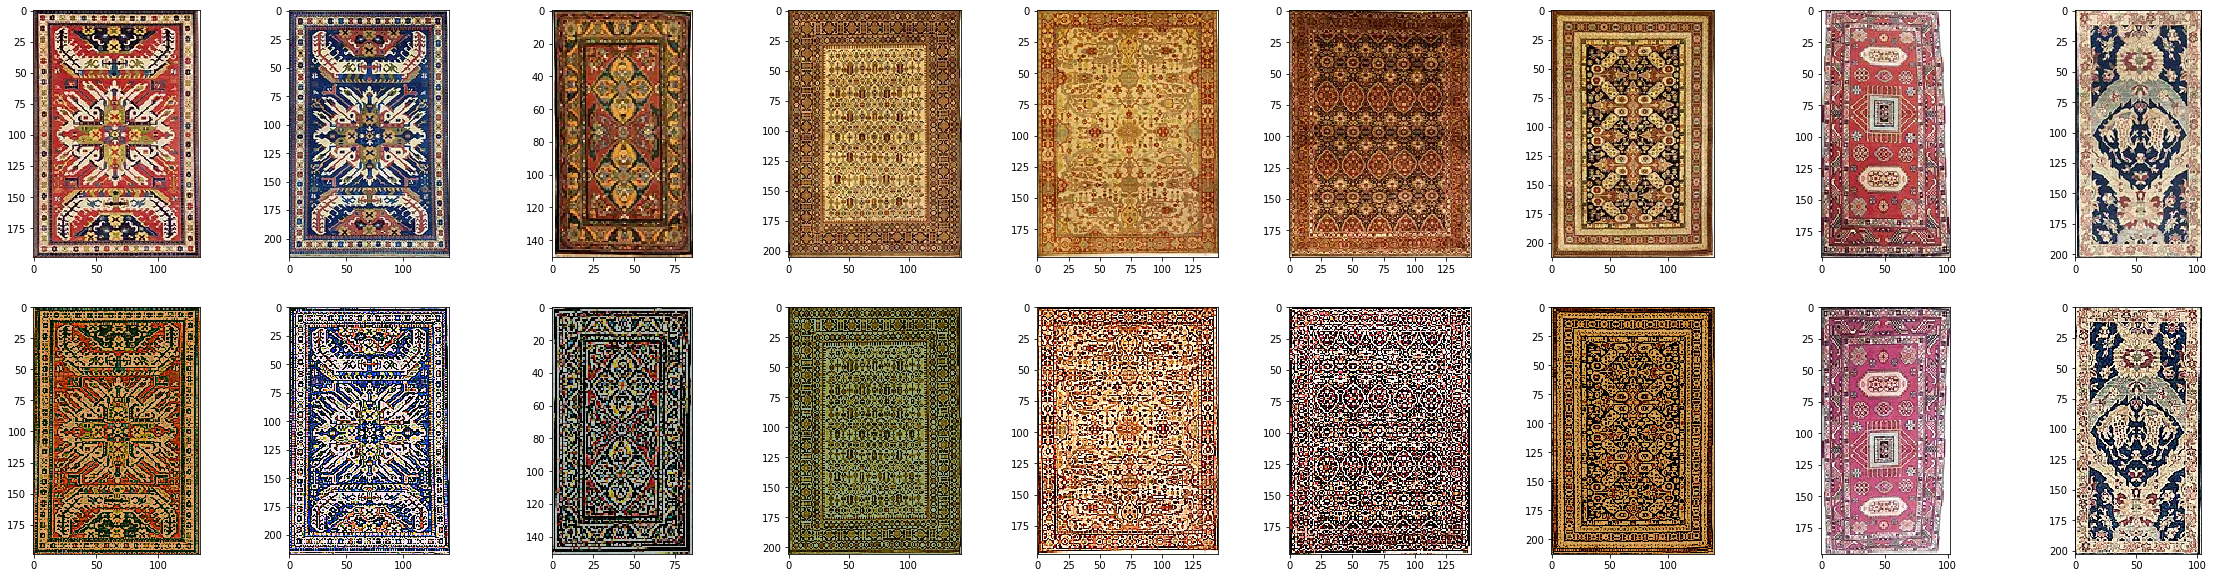

In [186]:
## Plotting
fig,axes = plt.subplots(2, len(images), figsize = (40,10))
for c,i in enumerate([j for j in range(len(images))]):
    axes[0,c].imshow(images[i])
    
    img_aug = seq.augment_image(images[i])
    axes[1,c].imshow(img_aug)

In [187]:
## Saving
for i, img in enumerate(images):
    for j in range(4):
        img_aug = seq.augment_image(img)
        plt.imsave(save_path + 'aug_img_' + str(i) + '_' + str(j) + '.png' , img_aug)
    